In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Market_Basket_Optimisation.csv")
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

,0
shrimp,0
almonds,1754
avocado,3112
vegetables mix,4156
green grapes,4972
whole weat flour,5637
yams,6132
cottage cheese,6520
energy drink,6847
tomato juice,7106


In [5]:
df.columns

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

In [6]:
df.shape

(7500, 20)

In [7]:
df.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [8]:
transation =[]
for i in range(0,len(df)):
  transation.append([str(df.values[i,j]) for j in range (0,20) if str(df.values[i,j])!='0'])

In [9]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=761442b3f6bf3625efce251ef648e2bb18ecaade6f1d293233dbe618b65134ee
  Stored in directory: /root/.cache/pip/wheels/7f/49/e3/42c73b19a264de37129fadaa0c52f26cf50e87de08fb9804af
Successfully built apyori


In [10]:
from apyori import apriori

In [11]:
rules =apriori(transactions=transation,min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2,max_length=2)

In [12]:
result=list(rules)


In [13]:
result

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005866666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.37288135593220345, lift=4.700185158809287)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.0033333333333333335, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confiden

In [14]:
import pandas as pd
def inspect_rules(rules):
    items = []
    for rule in rules:
        # The first element of an apyori.RelationRecord is a frozenset of items.
        # The second element is the support.
        # The third element is a list of apyori.OrderedStatistic objects.
        for ordered_statistic in rule.ordered_statistics:
            items.append({
                'Antecedent': tuple(ordered_statistic.items_base),
                'Consequent': tuple(ordered_statistic.items_add),
                'Support': rule.support,
                'Confidence': ordered_statistic.confidence,
                'Lift': ordered_statistic.lift
            })
    return pd.DataFrame(items)

df_rules = inspect_rules(result)
display(df_rules)

,Antecedent,Consequent,Support,Confidence,Lift
0,"(light cream,)","(chicken,)",0.004533,0.290598,4.843305
1,"(mushroom cream sauce,)","(escalope,)",0.005733,0.300699,3.790327
2,"(pasta,)","(escalope,)",0.005867,0.372881,4.700185
3,"(fromage blanc,)","(honey,)",0.003333,0.245098,5.178128
4,"(herb & pepper,)","(ground beef,)",0.016000,0.323450,3.291555
5,"(tomato sauce,)","(ground beef,)",0.005333,0.377358,3.840147
6,"(light cream,)","(olive oil,)",0.003200,0.205128,3.120612
7,"(whole wheat pasta,)","(olive oil,)",0.008000,0.271493,4.130221
8,"(pasta,)","(shrimp,)",0.005067,0.322034,4.514494


In [15]:
df_rules_sorted = df_rules.sort_values(by='Lift', ascending=False)
df_rules_sorted.head(10)


,Antecedent,Consequent,Support,Confidence,Lift
3,"(fromage blanc,)","(honey,)",0.003333,0.245098,5.178128
0,"(light cream,)","(chicken,)",0.004533,0.290598,4.843305
2,"(pasta,)","(escalope,)",0.005867,0.372881,4.700185
8,"(pasta,)","(shrimp,)",0.005067,0.322034,4.514494
7,"(whole wheat pasta,)","(olive oil,)",0.008000,0.271493,4.130221
5,"(tomato sauce,)","(ground beef,)",0.005333,0.377358,3.840147
1,"(mushroom cream sauce,)","(escalope,)",0.005733,0.300699,3.790327
4,"(herb & pepper,)","(ground beef,)",0.016000,0.323450,3.291555
6,"(light cream,)","(olive oil,)",0.003200,0.205128,3.120612


In [16]:
high_value_rules = df_rules[
    (df_rules['Lift'] > 4) &
    (df_rules['Confidence'] > 0.3)
].sort_values(by='Lift', ascending=False)

high_value_rules.head(10)


,Antecedent,Consequent,Support,Confidence,Lift
2,"(pasta,)","(escalope,)",0.005867,0.372881,4.700185
8,"(pasta,)","(shrimp,)",0.005067,0.322034,4.514494


In [17]:
df_rules.to_csv("apriori_rules.csv", index=False)
high_value_rules.to_csv("high_value_rules.csv", index=False)


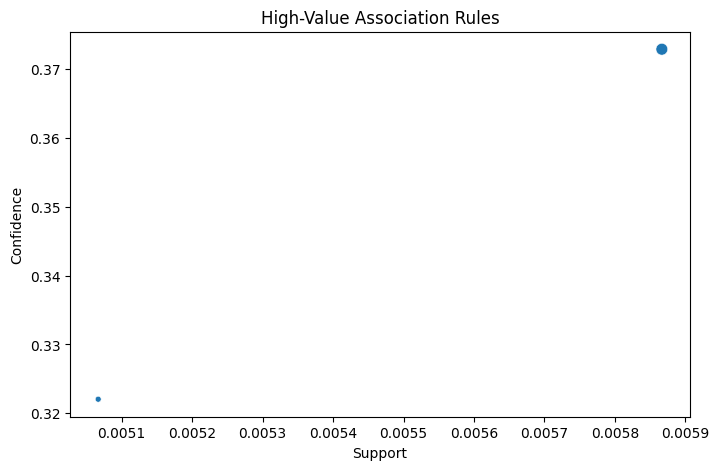

In [18]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=high_value_rules,
    x='Support',
    y='Confidence',
    size='Lift',
    legend=False
)
plt.title("High-Value Association Rules")
plt.show()
